In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
# Step 1: Load the data

df = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\FLIGHT_PRICE_PREDICTION\data\Clean_Dataset.csv") 
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (300153, 12)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Check for nulls and data types
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time     

In [4]:
print(df.shape)
print(df.info())
print(df.describe())


(300153, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean

In [5]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


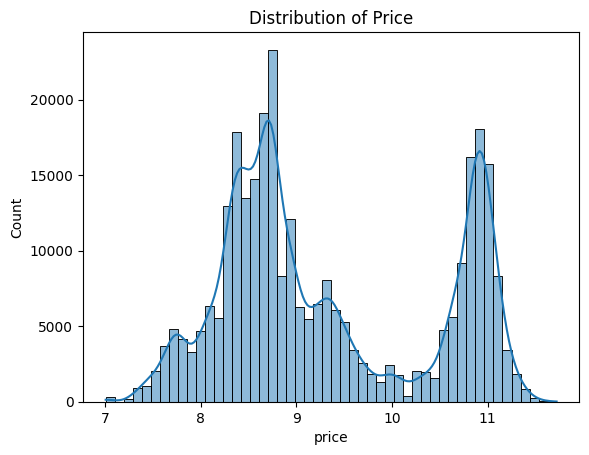

In [24]:
# Price distribution
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()


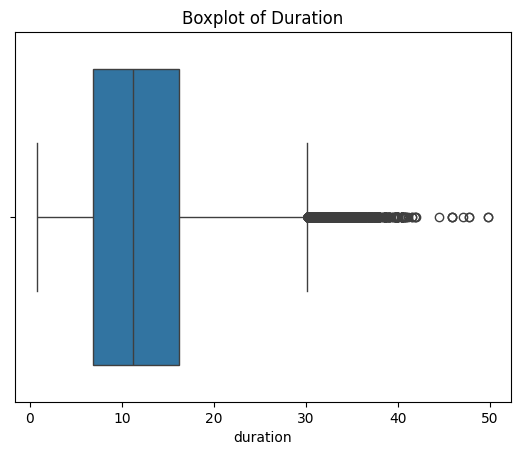

In [25]:
# Duration distribution
sns.boxplot(x=df['duration'])
plt.title('Boxplot of Duration')
plt.show()


In [26]:
df['duration'].quantile([0.25, 0.5, 0.75])


0.25     6.83
0.50    11.25
0.75    16.17
Name: duration, dtype: float64

In [27]:
# Class count
sns.countplot(x='class', data=df)
plt.title('Ticket Class Count')
plt.show()


ValueError: Could not interpret value `class` for `x`. An entry with this name does not appear in `data`.

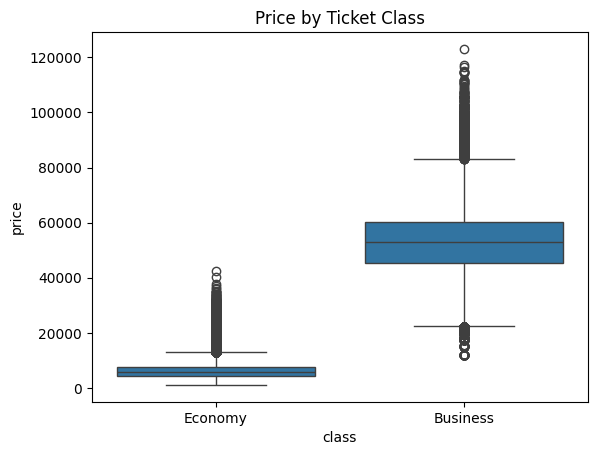

In [10]:
# Price vs class
sns.boxplot(x='class', y='price', data=df)
plt.title('Price by Ticket Class')
plt.show()


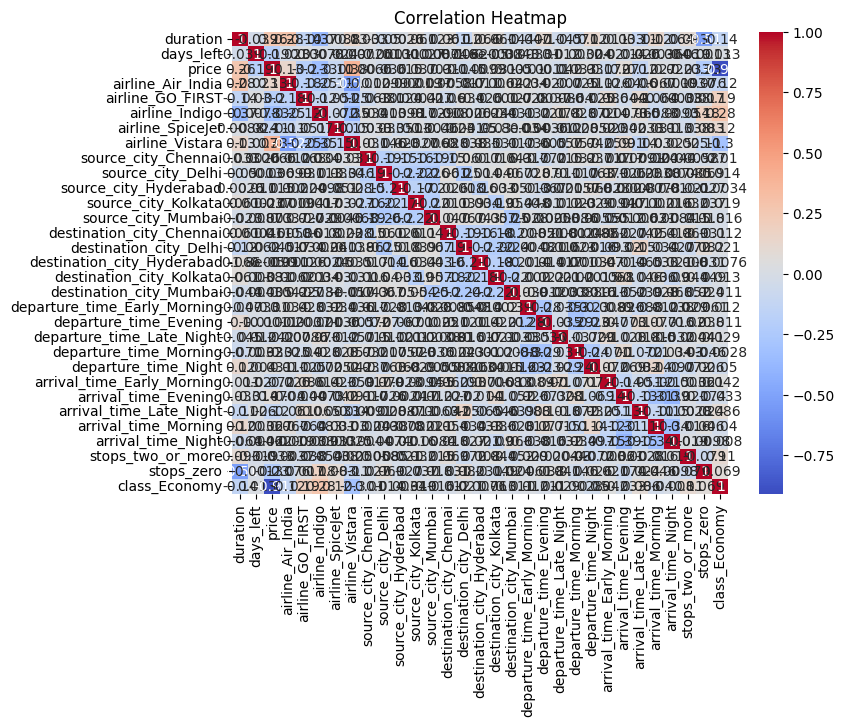

In [28]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
df.drop(columns=['Unnamed: 0', 'flight'], inplace=True)


KeyError: "['Unnamed: 0', 'flight'] not found in axis"

In [30]:
df.columns

Index(['duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'stops_two_or_more', 'stops_zero', 'class_Economy'],
      dtype='object')

In [31]:
df['price'] = np.log1p(df['price'])

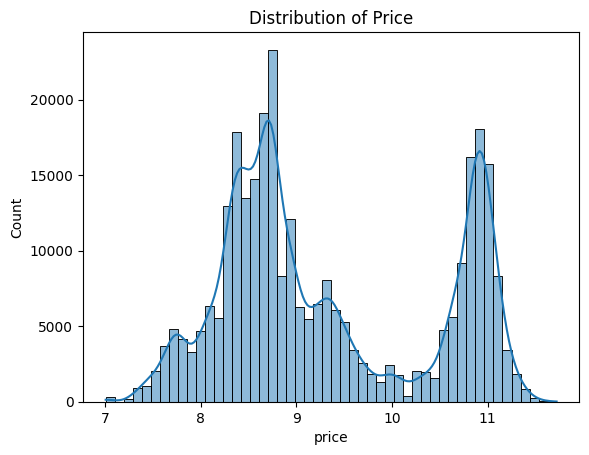

In [15]:
# Price distribution
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()


In [32]:
df = pd.get_dummies(df, columns=[
    'airline', 'source_city', 'destination_city', 'departure_time',
    'arrival_time', 'stops', 'class'
], drop_first=True)


KeyError: "None of [Index(['airline', 'source_city', 'destination_city', 'departure_time',\n       'arrival_time', 'stops', 'class'],\n      dtype='object')] are in the [columns]"

In [17]:
df.columns

Index(['duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'stops_two_or_more', 'stops_zero', 'class_Economy'],
      dtype='object')

In [33]:
# List of column prefixes to keep as features
feature_prefixes = ['airline_', 'source_city_', 'destination_city_', 'class_']

# Keep only the columns that match these prefixes
X = df[[col for col in df.columns if any(col.startswith(prefix) for prefix in feature_prefixes)]]

# Target variable
y = df['price']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

# Evaluate
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression Results:")
print("MAE:", lr_mae)
print("R2 Score:", lr_r2)


Linear Regression Results:
MAE: 0.031050308746843787
R2 Score: 0.8444383299656137


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\nRandom Forest Results:")
print("MAE:", rf_mae)
print("R2 Score:", rf_r2)



Random Forest Results:
MAE: 0.029678393742249766
R2 Score: 0.8565472906507995


In [37]:
from lightgbm import LGBMRegressor

# Initialize and train the model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict
lgbm_preds = lgbm_model.predict(X_test)

# Evaluate
lgbm_mae = mean_absolute_error(y_test, lgbm_preds)
lgbm_r2 = r2_score(y_test, lgbm_preds)

print("\nLightGBM Results:")
print("MAE:", lgbm_mae)
print("R2 Score:", lgbm_r2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 16
[LightGBM] [Info] Start training from score 2.329436

LightGBM Results:
MAE: 0.029721085487805204
R2 Score: 0.8563962588124951


In [38]:
# === Take Dynamic User Input from Console ===

# Collect inputs
airline = input("Enter Airline (e.g., Indigo, Air India, Vistara): ").strip()
source_city = input("Enter Source City (e.g., Delhi, Mumbai): ").strip()
destination_city = input("Enter Destination City (e.g., Bangalore, Hyderabad): ").strip()
flight_class = input("Enter Class (e.g., Economy, Business): ").strip()

# Create the user input dictionary
user_input = {
    'airline': airline,
    'source_city': source_city,
    'destination_city': destination_city,
    'class': flight_class
}

# Create a blank DataFrame with the same structure as X_train
user_df = pd.DataFrame([0]*len(X_train.columns), index=X_train.columns).T

# One-hot encode based on user input
for col in X_train.columns:
    if f"airline_{user_input['airline']}" == col:
        user_df[col] = 1
    if f"source_city_{user_input['source_city']}" == col:
        user_df[col] = 1
    if f"destination_city_{user_input['destination_city']}" == col:
        user_df[col] = 1
    if f"class_{user_input['class']}" == col:
        user_df[col] = 1

# Predict log price
log_price_prediction = rf_model.predict(user_df)[0]

# Convert back from log scale
predicted_price = np.expm1(log_price_prediction)

# Output
print(f"\n✈️ Predicted Flight Price: ₹{round(predicted_price, 2)}")



✈️ Predicted Flight Price: ₹8.61
